# 15wk-2: 기말고사 (예상문제)

최규빈  
2023-12-11

> **기말고사 관련 공지사항**
>
> -   시험일: 12월22일(월)
> -   시험시간: 16:00~17:50
> -   대면/비대면: 전북대 충남대 모두 “대면”시험으로 진행. 줌 필요X
> -   구글검색 허용, ChatGPT 허용
>
> **주의사항**
>
> -   부정행위적발시 기말고사점수 0점 처리함.
> -   본인확인을 위한 학생증 or 신분증을 지참.
> -   모두 대면시험이므로 별도의 준비시간없이 바로 시작함.
> -   질문은 카카오톡 채널을 통해서만 받으며, 대면질문은 받지 않음.
>     (충남대 학생들은 대면질문이 불가능하므로)
> -   지연제출시 5분단위로 감점이 있음. (중간고사때는 조금 늦어도 별도의
>     감점은 없었지만, 다른 학생들과의 형평성에 어긋난다는 피드백이
>     있어서 수정함.) **전북대의 경우 JBNU 와이파이를 이용할시
>     속도이슈가 있으니 개인노트북보다는 실습실의 컴퓨터로 제출하는 것을
>     권장함.**

<a href="https://colab.research.google.com/github/guebin/DV2023/blob/main/posts/15wk-2-fin.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio

In [2]:
pd.options.plotting.backend = "plotly"
pio.templates.default = "plotly_white"

# 1. NYCTaxi 자료 분석 (dashboard) – 100점

아래는 NYCTaxi자료에서 기본적인 전처리를 수행한 데이터프레임이다.

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2023/main/posts/NYCTaxi.csv").assign(
    log_trip_duration = lambda df: np.log(df.trip_duration),
    pickup_datetime = lambda df: df.pickup_datetime.apply(pd.to_datetime),
    dropoff_datetime = lambda df: df.dropoff_datetime.apply(pd.to_datetime),
    dist = lambda df: np.sqrt((df.pickup_latitude-df.dropoff_latitude)**2 + (df.pickup_longitude-df.dropoff_longitude)**2),
    #---#
    vendor_id = lambda df: df.vendor_id.map({1:'A',2:'B'})
).assign(
    speed = lambda df: df.dist / df.trip_duration,
    pickup_hour = lambda df: df.pickup_datetime.dt.hour,
    dropoff_hour = lambda df: df.dropoff_datetime.dt.hour,
    dayofweek = lambda df: df.pickup_datetime.dt.dayofweek
)
df_small = df[::100].reset_index(drop=True)

주어진 자료를 이용하여 (1)-(3)에 해당하는 시각화를 대시보드로 구현하고,
홈페이지를 남겨라. 답안 예시는 아래와 같다.

`(답안)`

-   <https://guebin.github.io/dash_test/NYCTaxi.html>
-   <https://github.com/guebin/dash_test> // 저는 의도적으로 코드를
    숨겼는데요, 학생들은 `*.qmd` 파일에 답안코드가 존재하는 상태이어야
    합니다.

**주의사항**

-   제출시간 이후에 대시보드 생성을 시도할 경우 부정행위로 간주하여
    기말고사 전체를 0점처리함. (git에 기록남아있음)
-   대시보드 구현이 되어있지 않은 경우 0점 처리함

**힌트**

아래와 같은 양식으로 qmd를 만들면 편리하다.

```` bash
---
title: "NYCTaxi"
author: "최규빈(2021-43052)"
format: dashboard
execute: 
  enabled: true
  cache: false
  freeze: false
---

```{python}
#| output: false
# 여기에 온갖코드를 넣음.
# 1-(1),(2),(3) 에 대응하는 plotly figure를 아래와 같은 이름으로 저장
# fig1 = ...
# fig2 = ...
# fig3 = ...
```

# 기말고사1-(1),(2)

```{python}
#| title: 요일,시간에 따른 평균속력 시각화        
fig1.show()
```

```{python}
#| title: 요일,시간에 따른 평균이동거리 시각화        
fig2.show()
```

# 기말고사1-(3)

```{python}
#| title: 속력별 경로 시각화
fig3.show()
```
````

## `(1)` 요일,시간에 따른 평균속력 시각화 – 25점

자료 `df`에서 시간에 따른 평균속력을 구하고 이를 대시보드에 시각화하라.

**README**

-   요일은 `{0:'월',1:'화',2:'수',3:'목',4:'금',5:'토',6:'일'}`의 규칙에
    따라 변환할 것

In [12]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'log_trip_duration', 'dist', 'speed', 'pickup_hour',
       'dropoff_hour', 'dayofweek'],
      dtype='object')

In [36]:
df.dist / df.trip_duration

0        0.000039
1        0.000018
2        0.000043
3        0.000047
4        0.000028
           ...   
14582    0.000037
14583    0.000027
14584    0.000052
14585    0.000023
14586    0.000060
Length: 14587, dtype: float64

In [33]:
np.sqrt((df.pickup_latitude - df.dropoff_latitude)**2 + (df.pickup_longitude - df.dropoff_longitude)**2) / df.trip_duration

0        0.000039
1        0.000018
2        0.000043
3        0.000047
4        0.000028
           ...   
14582    0.000037
14583    0.000027
14584    0.000052
14585    0.000023
14586    0.000060
Length: 14587, dtype: float64

In [46]:
df_featured = df[['pickup_datetime']].assign(avg_speed = df.dist / df.trip_duration)\
.assign(dow = lambda _df : _df.pickup_datetime.dt.dayofweek)\
.assign(pickup_hour = lambda _df : _df.pickup_datetime.dt.hour).drop('pickup_datetime', axis = 1)\
.pivot_table(index = 'dow', columns = 'pickup_hour', values = 'avg_speed', aggfunc = 'mean').stack().reset_index()\
.rename({'dow' : '요일', 'pickup_hour' : 'pickup 시간', 0 : '평균속력'}, axis = 1).assign()\
.assign(요일 = lambda _df : _df.요일.map({0:'월',1:'화',2:'수',3:'목',4:'금',5:'토',6:'일'}))

df_featured

,요일,pickup 시간,평균속력
0,월,0,0.000062
1,월,1,0.000070
2,월,2,0.000047
3,월,3,0.000058
4,월,4,0.000075
...,...,...,...
163,일,19,0.000044
164,일,20,0.000046
165,일,21,0.000050
166,일,22,0.000051


In [74]:
df_featured['pickup 시간']

0       0
1       0
2       0
3       0
4       0
       ..
163    23
164    23
165    23
166    23
167    23
Name: pickup 시간, Length: 168, dtype: int32

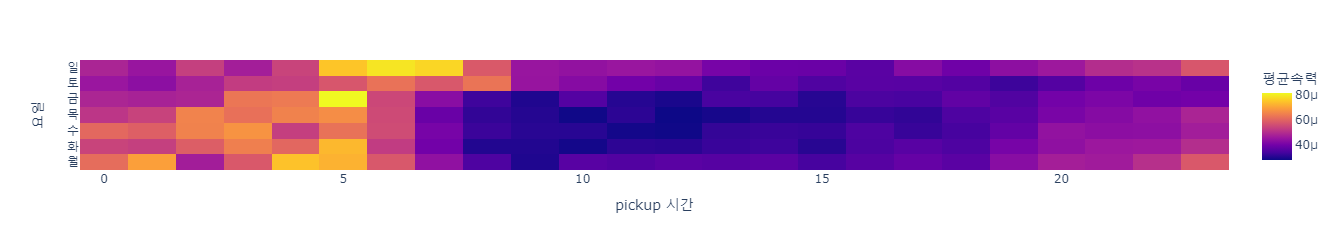

In [47]:
fig1 = px.density_heatmap(
    data_frame = df_featured,
    x = 'pickup 시간',
    y = '요일',
    z = '평균속력',
    nbinsx = 24,
    nbinsy = 7,
    width = 1200,
    height = 250
)

fig1.update_layout(coloraxis_colorbar={'title':'평균속력'})

fig1.show()

## `(2)` 요일,시간에 따른 평균속력 시각화 – 25점

자료 `df`에서 시간에 따른 평균이동거리를 구하고 이를 대시보드에
시각화하라.

**README**

-   요일은 `{0:'월',1:'화',2:'수',3:'목',4:'금',5:'토',6:'일'}`의 규칙에
    따라 변환할 것

In [42]:
df_featured2 = df[['pickup_datetime']].assign(avg_dist = df.dist)\
.assign(dow = lambda _df : _df.pickup_datetime.dt.dayofweek)\
.assign(pickup_hour = lambda _df : _df.pickup_datetime.dt.hour).drop('pickup_datetime', axis = 1)\
.pivot_table(index = 'dow', columns = 'pickup_hour', values = 'avg_dist', aggfunc = 'mean').stack().reset_index()\
.rename({'dow' : '요일', 'pickup_hour' : 'pickup 시간', 0 : '평균이동거리'}, axis = 1)\
.assign(요일 = lambda _df : _df.요일.map({0:'월',1:'화',2:'수',3:'목',4:'금',5:'토',6:'일'}))

df_featured2

,요일,pickup 시간,평균이동거리
0,월,0,0.037158
1,월,1,0.052003
2,월,2,0.034542
3,월,3,0.055963
4,월,4,0.070630
...,...,...,...
163,일,19,0.033590
164,일,20,0.042992
165,일,21,0.041279
166,일,22,0.039894


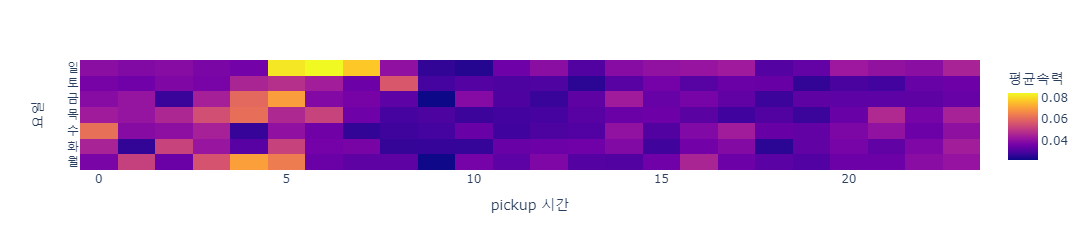

In [44]:
fig2 = px.density_heatmap(
    data_frame = df_featured2,
    x = 'pickup 시간',
    y = '요일',
    z = '평균이동거리',
    nbinsx = 24,
    nbinsy = 7,
    width = 1200,
    height = 250
)

fig2.update_layout(coloraxis_colorbar={'title':'평균이동거리'})

## `(3)` 속력별 경로시각화 – 50점

자료 `df_small`에서 속력을 quatile에 따라 4개의 구간으로 나누고, 구간별
이동경로를 대시보드에 시각화하라.

**README**

-   Zoom = 11 로 설정할것. Figure의 width, height는 설정하지 말것
-   기타 설정값에 대해서는 궁금한것이 있다면 질문할 것

**힌트**: 아래의 코드를 관찰하세요

In [15]:
speed = pd.Series([1,1,2,2,3,3,4,4])
print(pd.qcut(speed,4))
print(pd.qcut(speed,4,labels=['매우느림','조금느림','조금빠름','매우빠름']))

0    (0.999, 1.75]
1    (0.999, 1.75]
2      (1.75, 2.5]
3      (1.75, 2.5]
4      (2.5, 3.25]
5      (2.5, 3.25]
6      (3.25, 4.0]
7      (3.25, 4.0]
dtype: category
Categories (4, interval[float64, right]): [(0.999, 1.75] < (1.75, 2.5] < (2.5, 3.25] < (3.25, 4.0]]
0    매우느림
1    매우느림
2    조금느림
3    조금느림
4    조금빠름
5    조금빠름
6    매우빠름
7    매우빠름
dtype: category
Categories (4, object): ['매우느림' < '조금느림' < '조금빠름' < '매우빠름']

In [97]:
df_pickup = df_small.assign(avg_speed = lambda _df : pd.qcut(_df.speed, q = 4, labels=['매우느림 (path)','조금느림 (path)','조금빠름 (path)','매우빠름 (path)'])).sort_values('avg_speed')\
.loc[:,['id', 'avg_speed', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'passenger_count']]\
.drop(['dropoff_latitude', 'dropoff_longitude'], axis = 1).rename({'pickup_latitude' : 'latitude', 'pickup_longitude' : 'longitude'}, axis = 1)

df_dropoff = df_small.assign(avg_speed = lambda _df : pd.qcut(_df.speed, q = 4, labels=['매우느림 (path)','조금느림 (path)','조금빠름 (path)','매우빠름 (path)'])).sort_values('avg_speed')\
.loc[:,['id', 'avg_speed', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'passenger_count']]\
.drop(['pickup_latitude', 'pickup_longitude'], axis = 1).rename({'dropoff_latitude' : 'latitude', 'dropoff_longitude' : 'longitude'}, axis = 1)

df_featured3 = pd.concat([df_pickup, df_dropoff], axis = 0).reset_index(drop = True).rename({'avg_speed' : '평균속력'}, axis = 1)
df_featured3

,id,평균속력,latitude,longitude,passenger_count
0,id0503659,매우느림 (path),40.784500,-73.952209,2
1,id3888107,매우느림 (path),40.757469,-73.969429,1
2,id0092643,매우느림 (path),40.741840,-74.000877,2
3,id1625242,매우느림 (path),40.737778,-73.997627,1
4,id3508248,매우느림 (path),40.743805,-73.987953,1
...,...,...,...,...,...
287,id0037819,매우빠름 (path),40.740059,-73.995300,6
288,id3666656,매우빠름 (path),40.753098,-73.993401,2
289,id0419095,매우빠름 (path),40.744606,-73.971443,1
290,id3457947,매우빠름 (path),40.776581,-73.962051,1


In [100]:
fig3 = px.line_mapbox(
    data_frame = df_featured3,
    lat = 'latitude',
    lon = 'longitude',
    color = '평균속력',
    line_group = 'id',
    center = {'lat' : 40.7322, 'lon' : -73.9052},
    #---#
    mapbox_style = 'carto-positron',
    zoom = 11
)

points = px.scatter_mapbox(
    data_frame = df_featured3,
    lat = 'latitude',
    lon = 'longitude',
    color = '평균속력',
    size = 'passenger_count',
    size_max = 10,
    #---#
    mapbox_style = 'carto-positron',
    zoom = 11
).data

for p in points :
    fig3.add_trace(p)

fig3.update_traces(line = {'width' : 1})
fig3.data[-1].update(name = '매우빠름 (pickup/dropoff)')
fig3.data[-2].update(name = '조금빠름 (pickup/dropoff)')
fig3.data[-3].update(name = '조금느림 (pickup/dropoff)')
fig3.data[-4].update(name = '매우느림 (pickup/dropoff)')

fig3.show();

/root/anaconda3/envs/py/lib/python3.10/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/root/anaconda3/envs/py/lib/python3.10/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Scattermapbox({
    'hovertemplate': ('평균속력=매우느림 (path)<br>passenger_' ... 'ongitude=%{lon}<extra></extra>'),
    'lat': array([40.78450012, 40.75746918, 40.74184036, 40.73777771, 40.74380493,
                  40.74671555, 40.78596115, 40.75983047, 40.73244476, 40.76341248,
                  40.79840851, 40.76351929, 40.7579689 , 40.76140594, 40.75623322,
                  40.74240494, 40.77922821, 40.72243118, 40.77612305, 40.70718384,
                  40.74414062, 40.76290131, 40.7715416 , 40.73936844, 40.79404831,
                  40.72259521, 40.74682617, 40.74729538, 40.76639175, 40.77386856,
                  40.74432373, 40.72234726, 40.78168488, 40.7395401 , 40.76839828,
                  40.72530365, 40.73308182, 40.80483246, 40.77196884, 40.74722672,
                  40.74677658, 40.75000763, 40.75249863, 40.77871323, 40.75983047,
                  40.73023605, 40.7196312 , 40.79058838, 40.76174927, 40.7437706 ,
                  40.76454163, 40.73437119, 40.72117233, 40.